In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
from keras.preprocessing.text import one_hot
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import GRU
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import MaxPooling1D
from numpy import array
from numpy import asarray
from numpy import zeros


In [2]:
def preprocess_text(sen):
 # Removing html tags
 sentence = remove_tags(sen)
 # Remove punctuations and numbers
 sentence = re.sub('[^a-zA-Z]', ' ', sentence)
 # Single character removal
 sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
 # Removing multiple spaces
 sentence = re.sub(r'\s+', ' ', sentence)
 return sentence


TAG_RE = re.compile(r'<[^>]+>')


def remove_tags(text):
 return TAG_RE.sub('', text)

In [3]:
!wget https://raw.githubusercontent.com/Ankit152/IMDB-sentiment-analysis/master/IMDB-Dataset.csv

--2024-05-02 21:48:31--  https://raw.githubusercontent.com/Ankit152/IMDB-sentiment-analysis/master/IMDB-Dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66212309 (63M) [text/plain]
Saving to: ‘IMDB-Dataset.csv’

IMDB-Dataset.csv    100%[===================>]  63.14M   205MB/s    in 0.3s    

2024-05-02 21:48:33 (205 MB/s) - ‘IMDB-Dataset.csv’ saved [66212309/66212309]



In [4]:
movie_reviews=pd.read_csv('/content/IMDB-Dataset.csv')
movie_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


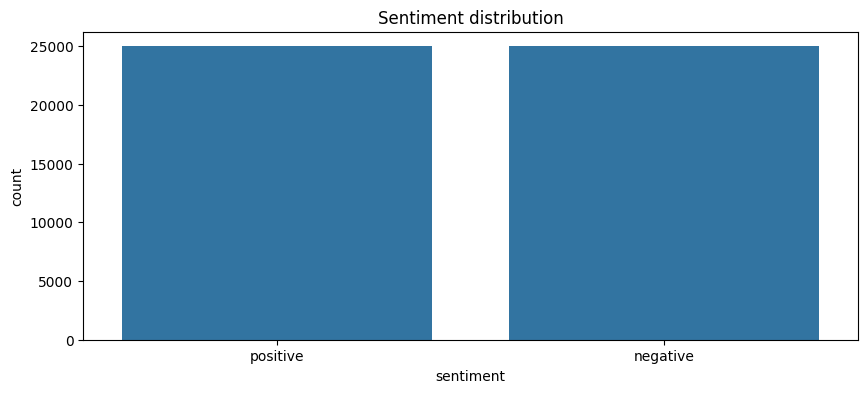

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
sns.countplot(data=movie_reviews, x="sentiment")
plt.title("Sentiment distribution")
plt.show()

In [6]:
movie_reviews.isna().sum()

review       0
sentiment    0
dtype: int64

In [7]:
X = []
sentences = list(movie_reviews['review'])
for sen in sentences:
  X.append(preprocess_text(sen))

In [8]:
X[0]

'One of the other reviewers has mentioned that after watching just Oz episode you ll be hooked They are right as this is exactly what happened with me The first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the word It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda Em City is home to many Aryans Muslims gangstas Latinos Christians Italians Irish and more so scuffles death stares dodgy dealings and shady agreements are never far away would say the main appeal of the show is due to the fact that it goes where other shows wouldn dare Forget pretty picture

In [9]:
type(X[0]),len(X[0])

(str, 1653)

In [10]:
y = movie_reviews['sentiment']
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

In [11]:
y[:5]

array([1, 1, 1, 0, 1])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.20, random_state=42)

In [13]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


In [14]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'of': 3,
 'to': 4,
 'is': 5,
 'it': 6,
 'in': 7,
 'this': 8,
 'that': 9,
 'was': 10,
 'as': 11,
 'movie': 12,
 'for': 13,
 'with': 14,
 'but': 15,
 'film': 16,
 'you': 17,
 'on': 18,
 'not': 19,
 'are': 20,
 'he': 21,
 'his': 22,
 'have': 23,
 'one': 24,
 'be': 25,
 'all': 26,
 'at': 27,
 'they': 28,
 'by': 29,
 'an': 30,
 'who': 31,
 'so': 32,
 'from': 33,
 'like': 34,
 'there': 35,
 'or': 36,
 'just': 37,
 'her': 38,
 'out': 39,
 'about': 40,
 'if': 41,
 'has': 42,
 'what': 43,
 'some': 44,
 'good': 45,
 'can': 46,
 'more': 47,
 'very': 48,
 'when': 49,
 'she': 50,
 'up': 51,
 'no': 52,
 'time': 53,
 'my': 54,
 'even': 55,
 'would': 56,
 'which': 57,
 'story': 58,
 'only': 59,
 'really': 60,
 'see': 61,
 'their': 62,
 'had': 63,
 'me': 64,
 'well': 65,
 'we': 66,
 'were': 67,
 'than': 68,
 'much': 69,
 'bad': 70,
 'been': 71,
 'get': 72,
 'do': 73,
 'people': 74,
 'great': 75,
 'other': 76,
 'also': 77,
 'will': 78,
 'into': 79,
 'how': 80,
 'because': 81,
 'do

In [15]:
len(tokenizer.word_index)

92546

In [16]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [17]:
vocab_size

92547

In [18]:
X_train[0]

array([   4,    1,  296,  140, 2854,    2,  405,  614,    1,  263,    5,
       3514,  977,    4,   25,   37,   11, 1237,  215,   62,    2,   35,
          5,   27,  217,   24,  189, 1430,    7, 1068,   15, 4868,   81,
          1,  221,   63,  351,   64,   52,   24,    4, 3547,   13,    6,
         19,  192,    4,  859, 3430, 1720,   17,   23,    4,  158,  194,
        175,  106,    9, 1604,  461,   71,  218,    4,  321,    2, 3431,
         31,   20,   47,   68, 1844, 4668,   11,    6, 1365,    8,   16,
          5, 3475, 1990,   14,   59,    1, 2380,  460,  518,    2,  170,
       2524, 2698, 1745,    4,  573,    6,   33,    1, 3750,  198,  345,
       3812], dtype=int32)

In [19]:
X_train[0].shape

(100,)

In [20]:
import os
import urllib.request
 #request to get the glove file from colab

In [21]:
urllib.request.urlretrieve('https://nlp.stanford.edu/data/glove.6B.zip','glove.6B.zip')
#get the glove file

('glove.6B.zip', <http.client.HTTPMessage at 0x7a068b235960>)

In [22]:
!unzip "/content/glove.6B.zip" -d "/content/"
#unzip the glove file to get the files .txt

Archive:  /content/glove.6B.zip
  inflating: /content/glove.6B.50d.txt  
  inflating: /content/glove.6B.100d.txt  
  inflating: /content/glove.6B.200d.txt  
  inflating: /content/glove.6B.300d.txt  


In [23]:
from numpy import array
from numpy import asarray
from numpy import zeros
embeddings_dictionary = dict()
glove_file = open("glove.6B.100d.txt", encoding="utf8")
for line in glove_file:
  records = line.split()
  word = records[0]
  vector_dimensions = asarray(records[1:],dtype='float32')
  embeddings_dictionary [word] = vector_dimensions
glove_file.close()


In [24]:
embeddings_dictionary
#show the embedding_dictionnary: each word and its embedding

{'the': array([-0.038194, -0.24487 ,  0.72812 , -0.39961 ,  0.083172,  0.043953,
        -0.39141 ,  0.3344  , -0.57545 ,  0.087459,  0.28787 , -0.06731 ,
         0.30906 , -0.26384 , -0.13231 , -0.20757 ,  0.33395 , -0.33848 ,
        -0.31743 , -0.48336 ,  0.1464  , -0.37304 ,  0.34577 ,  0.052041,
         0.44946 , -0.46971 ,  0.02628 , -0.54155 , -0.15518 , -0.14107 ,
        -0.039722,  0.28277 ,  0.14393 ,  0.23464 , -0.31021 ,  0.086173,
         0.20397 ,  0.52624 ,  0.17164 , -0.082378, -0.71787 , -0.41531 ,
         0.20335 , -0.12763 ,  0.41367 ,  0.55187 ,  0.57908 , -0.33477 ,
        -0.36559 , -0.54857 , -0.062892,  0.26584 ,  0.30205 ,  0.99775 ,
        -0.80481 , -3.0243  ,  0.01254 , -0.36942 ,  2.2167  ,  0.72201 ,
        -0.24978 ,  0.92136 ,  0.034514,  0.46745 ,  1.1079  , -0.19358 ,
        -0.074575,  0.23353 , -0.052062, -0.22044 ,  0.057162, -0.15806 ,
        -0.30798 , -0.41625 ,  0.37972 ,  0.15006 , -0.53212 , -0.2055  ,
        -1.2526  ,  0.071624,  

In [25]:
len(embeddings_dictionary),type(embeddings_dictionary)
#dictionnary of 400000 and its embeddings

(400000, dict)

In [26]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
  embedding_vector = embeddings_dictionary.get(word)
  if embedding_vector is not None:
    embedding_matrix[index] = embedding_vector

In [27]:
embedding_matrix.shape

(92547, 100)

In [28]:
embedding_matrix[:5]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [29]:
model=Sequential()
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix],input_length=maxlen , trainable=False))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          9254700   
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 1)                 10001     
                                                                 
Total params: 9264701 (35.34 MB)
Trainable params: 10001 (39.07 KB)
Non-trainable params: 9254700 (35.30 MB)
_________________________________________________________________


In [31]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:
history=model.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1,validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 3s 4ms/step - loss: 0.6079 - accuracy: 0.6666 - val_loss: 0.5362 - val_accuracy: 0.7318
Epoch 2/6
250/250 [==============================] - 1s 3ms/step - loss: 0.5031 - accuracy: 0.7577 - val_loss: 0.5304 - val_accuracy: 0.7380
Epoch 3/6
250/250 [==============================] - 1s 3ms/step - loss: 0.4620 - accuracy: 0.7840 - val_loss: 0.5178 - val_accuracy: 0.7445
Epoch 4/6
250/250 [==============================] - 1s 3ms/step - loss: 0.4383 - accuracy: 0.7988 - val_loss: 0.5365 - val_accuracy: 0.7370
Epoch 5/6
250/250 [==============================] - 1s 3ms/step - loss: 0.4217 - accuracy: 0.8082 - val_loss: 0.5265 - val_accuracy: 0.7450
Epoch 6/6
250/250 [==============================] - 1s 3ms/step - loss: 0.4101 - accuracy: 0.8129 - val_loss: 0.5339 - val_accuracy: 0.7444


In [33]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.5368 - accuracy: 0.7441
Test Score: 0.5367635488510132
Test Accuracy: 0.7440999746322632


In [34]:
history.history

{'loss': [0.6079044342041016,
  0.5030550956726074,
  0.461991548538208,
  0.4383445084095001,
  0.4217347800731659,
  0.41011956334114075],
 'accuracy': [0.6666250228881836,
  0.7576562762260437,
  0.7839999794960022,
  0.7987812757492065,
  0.8081562519073486,
  0.8129374980926514],
 'val_loss': [0.5362399816513062,
  0.530368983745575,
  0.5178480744361877,
  0.5364518761634827,
  0.5264653563499451,
  0.5339273810386658],
 'val_accuracy': [0.7317500114440918,
  0.7379999756813049,
  0.7444999814033508,
  0.7369999885559082,
  0.7450000047683716,
  0.7443749904632568]}

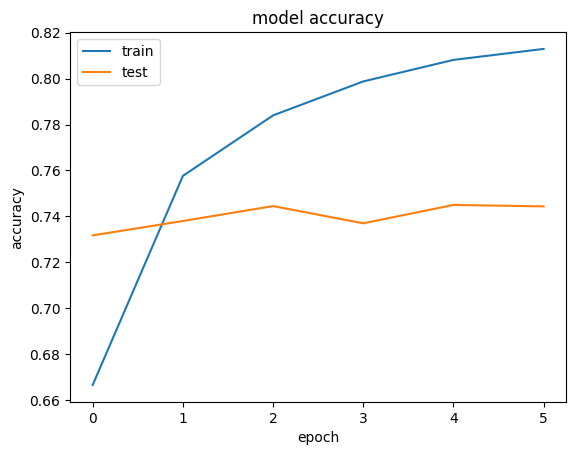

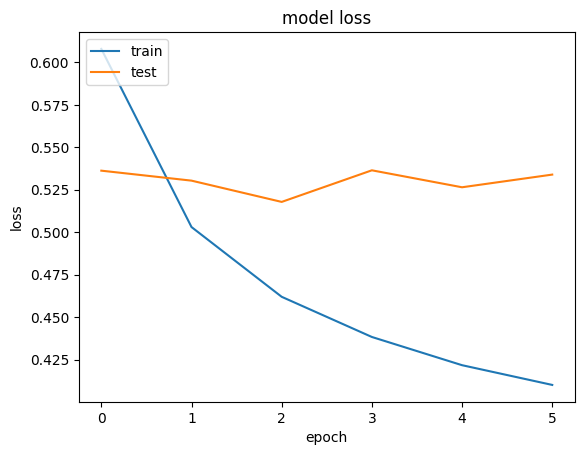

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


In [36]:
from keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='val_loss',patience=3)

In [37]:
history_early_stop=model.fit(X_train,y_train,epochs=6,batch_size=128,
                             verbose=1,validation_split=0.2,callbacks=[es])
#only 4 epochs

Epoch 1/6
250/250 [==============================] - 1s 5ms/step - loss: 0.3975 - accuracy: 0.8203 - val_loss: 0.5383 - val_accuracy: 0.7442
Epoch 2/6
250/250 [==============================] - 1s 5ms/step - loss: 0.3901 - accuracy: 0.8254 - val_loss: 0.5437 - val_accuracy: 0.7433
Epoch 3/6
250/250 [==============================] - 1s 5ms/step - loss: 0.3838 - accuracy: 0.8290 - val_loss: 0.5539 - val_accuracy: 0.7404
Epoch 4/6
250/250 [==============================] - 1s 5ms/step - loss: 0.3801 - accuracy: 0.8295 - val_loss: 0.5847 - val_accuracy: 0.7296


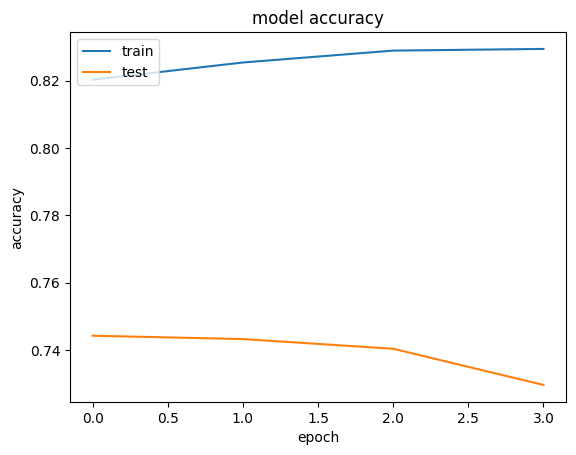

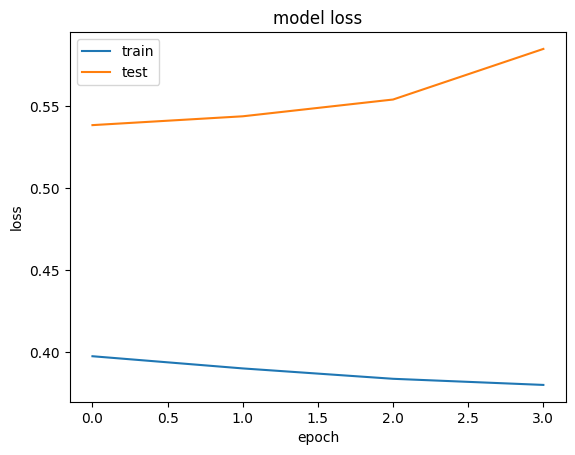

In [38]:
plt.plot(history_early_stop.history['accuracy'])
plt.plot(history_early_stop.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(history_early_stop.history['loss'])
plt.plot(history_early_stop.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [39]:
model_2=Sequential()
model_2.add(Embedding(vocab_size, 100, weights=[embedding_matrix],input_length=maxlen , trainable=False))
model_2.add(Conv1D(128,5,activation='relu'))
model_2.add(GlobalMaxPooling1D())
model_2.add(Dense(1,activation='sigmoid'))

In [40]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          9254700   
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9318957 (35.55 MB)
Trainable params: 64257 (251.00 KB)
Non-trainable params: 9254700 (35.30 MB)
_________________________________________________________________


In [41]:
model_2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [42]:
history_2=model_2.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1,validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 5s 7ms/step - loss: 0.5045 - accuracy: 0.7520 - val_loss: 0.3980 - val_accuracy: 0.8209
Epoch 2/6
250/250 [==============================] - 1s 4ms/step - loss: 0.3732 - accuracy: 0.8350 - val_loss: 0.3741 - val_accuracy: 0.8315
Epoch 3/6
250/250 [==============================] - 1s 4ms/step - loss: 0.3223 - accuracy: 0.8637 - val_loss: 0.3710 - val_accuracy: 0.8328
Epoch 4/6
250/250 [==============================] - 1s 4ms/step - loss: 0.2822 - accuracy: 0.8857 - val_loss: 0.3444 - val_accuracy: 0.8462
Epoch 5/6
250/250 [==============================] - 1s 4ms/step - loss: 0.2544 - accuracy: 0.8997 - val_loss: 0.3441 - val_accuracy: 0.8468
Epoch 6/6
250/250 [==============================] - 1s 4ms/step - loss: 0.2210 - accuracy: 0.9170 - val_loss: 0.3424 - val_accuracy: 0.8486


In [43]:
score_2 = model_2.evaluate(X_test, y_test, verbose=0)
print("Test Score:", score_2[0])
print("Test Accuracy:", score_2[1])

Test Score: 0.34332993626594543
Test Accuracy: 0.8460000157356262


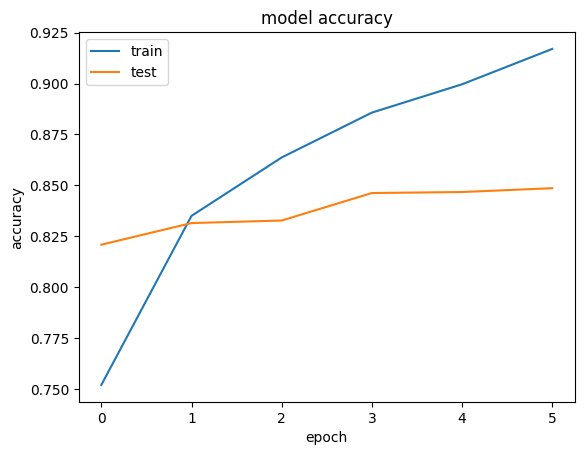

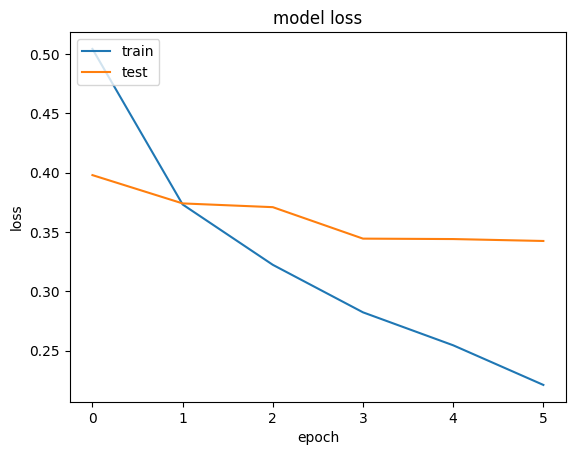

In [44]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [45]:
model_3=Sequential()
model_3.add(Embedding(vocab_size, 100, weights=[embedding_matrix],input_length=maxlen , trainable=False))
model_3.add(LSTM(128))
model_3.add(Dense(1,activation='sigmoid'))

In [46]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          9254700   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9372077 (35.75 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 9254700 (35.30 MB)
_________________________________________________________________


In [47]:
model_3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [48]:
history_3=model_3.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1,validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 5s 14ms/step - loss: 0.5629 - accuracy: 0.7084 - val_loss: 0.4713 - val_accuracy: 0.7810
Epoch 2/6
250/250 [==============================] - 2s 10ms/step - loss: 0.4458 - accuracy: 0.7921 - val_loss: 0.4017 - val_accuracy: 0.8135
Epoch 3/6
250/250 [==============================] - 3s 10ms/step - loss: 0.3958 - accuracy: 0.8207 - val_loss: 0.3867 - val_accuracy: 0.8263
Epoch 4/6
250/250 [==============================] - 2s 10ms/step - loss: 0.3632 - accuracy: 0.8394 - val_loss: 0.3533 - val_accuracy: 0.8432
Epoch 5/6
250/250 [==============================] - 2s 10ms/step - loss: 0.3421 - accuracy: 0.8478 - val_loss: 0.3425 - val_accuracy: 0.8464
Epoch 6/6
250/250 [==============================] - 2s 9ms/step - loss: 0.3222 - accuracy: 0.8590 - val_loss: 0.3349 - val_accuracy: 0.8531


In [49]:
score_3 = model_3.evaluate(X_test, y_test, verbose=0)
print("Test Score:", score_3[0])
print("Test Accuracy:", score_3[1])

Test Score: 0.33371680974960327
Test Accuracy: 0.8522999882698059


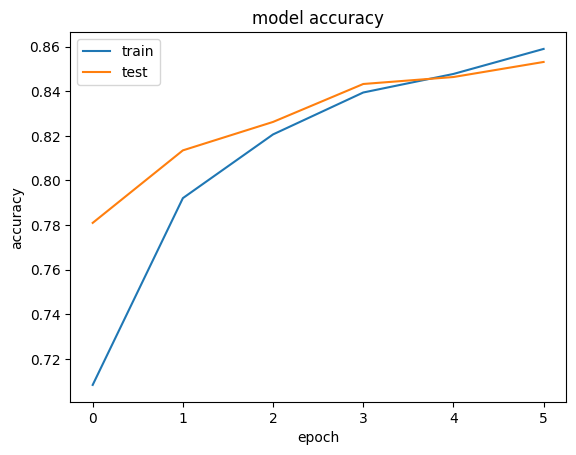

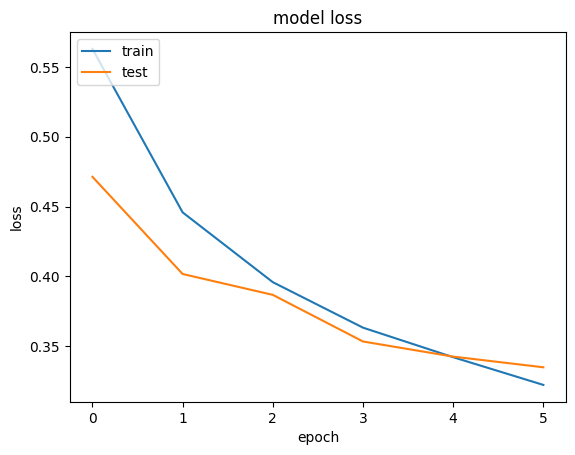

In [50]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

**3)Comparer les résultats des 3 classifieurs**
On a LSTM accuracy=0.84 == CNN accuracy=0.84 mais le 1er modéle accuracy=0.74 donc on a bien besoin des Special layers comme LSTM,CONVOULTION,GRU ect (les modéles simples avec seulement Dense layers ont des valeurs d'accuracies faibles).

**4)Choisir une instance aléatoirement et donner sa polarité.**

In [51]:
inp=tokenizer.texts_to_sequences(['good morning'])
inp=pad_sequences(inp,maxlen=maxlen,padding='post')
result=model_3.predict(inp)

1/1 [==============================] - 0s 343ms/step


In [52]:
result[0][0]

0.85612386

In [53]:
round(result[0][0])

1

#**PARTIE COMPTE RENDU**#


In [ ]:
gru_model=Sequential()
gru_model.add(Embedding(vocab_size, 100, weights=[embedding_matrix],input_length=maxlen , trainable=False))
gru_model.add(GRU(128))
gru_model.add(Dense(1,activation='sigmoid'))
gru_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=gru_model.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1,validation_split=0.2)


**First we'll create the 3 models: lstm , GRU and RNN+CNN as functions to reuse them**

RQ: dans le cas de glove embedding, on utilisé 100 donc embedding matrix de shape (100,) mais dans Fasttext et Word2vec, on a trouvé des embeddings de shape (300,) donc on a modifié le Embedding layer comme suit: le 2nd param est 300



`  model.add(Embedding(vocab_size, 300, weights=[embedding_matrix],input_length=maxlen , trainable=False))

Dans chaque embedding on va:

**-import le embedding**

**-créer le embedding_matrix**

**-utiliser les fonctions pour créer les 3 modéles LSTM,GRU et CNN+LSTM**

**-évauluer ces modéles avec la fonction `evaluate_model(model)`**

**-tracer les courbes avec la fonction `plot_results(history)`**


`

#Define the models, evaluation and plotting functions#

In [93]:
def lstm_model():
  model=Sequential()
  model.add(Embedding(vocab_size, 300, weights=[embedding_matrix],input_length=maxlen , trainable=False))
  model.add(LSTM(128))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  history=model.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1,validation_split=0.2)
  return model,history

In [94]:
def gru_model():
  model=Sequential()
  model.add(Embedding(vocab_size, 300, weights=[embedding_matrix],input_length=maxlen , trainable=False))
  model.add(GRU(128))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  history=model.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1,validation_split=0.2)
  return model,history

In [117]:
from keras.layers import MaxPooling1D
def cnn_lstm_model():
  model=Sequential()
  model.add(Embedding(vocab_size, 300, weights=[embedding_matrix],input_length=maxlen , trainable=False))
  model.add(Conv1D(128,5,activation='relu'))
  model.add(MaxPooling1D(pool_size=2))
  model.add(LSTM(128))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  history=model.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1,validation_split=0.2)


  return model,history

In [96]:
def evaluate_model(model):
  score = model.evaluate(X_test, y_test, verbose=0)
  print("Test Score:", score[0])
  print("Test Accuracy:", score[1])

In [97]:
def plot_results(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train','test'], loc='upper left')
  plt.show()
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train','test'], loc='upper left')
  plt.show()

#FASTTEXT EMBEDDINGS#

In [72]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.en.vec

--2024-05-02 22:18:51--  https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.en.vec
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.96, 3.163.189.51, 3.163.189.108, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6597238061 (6.1G) [binary/octet-stream]
Saving to: ‘wiki.en.vec’

wiki.en.vec         100%[===================>]   6.14G   113MB/s    in 45s     

2024-05-02 22:19:36 (139 MB/s) - ‘wiki.en.vec’ saved [6597238061/6597238061]



In [73]:
from tqdm import tqdm
import os, re, csv, math, codecs
print('loading word embeddings...')
embeddings_dictionary = {}
f = codecs.open('wiki.en.vec', encoding='utf-8')
for line in tqdm(f):
    values = line.rstrip().rsplit(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_dictionary[word] = coefs
f.close()
print('found %s word vectors' % len(embeddings_dictionary))

loading word embeddings...


2519428it [06:23, 6572.47it/s]

found 2519396 word vectors


In [74]:
embeddings_dictionary.get('word')#example

array([-2.3880e-01,  5.6796e-02, -1.0488e-02,  1.3781e-01, -8.2600e-02,
        3.1404e-02, -3.9842e-01, -2.6896e-01,  3.7160e-01, -1.9283e-01,
       -4.3051e-04,  4.0367e-02, -5.3095e-02, -6.3550e-02, -5.8880e-02,
       -8.2725e-02,  2.4586e-02,  8.2131e-02,  2.4972e-01,  2.7800e-01,
       -9.9849e-02,  2.0151e-02,  9.3349e-02, -1.4366e-01, -1.1492e-01,
        1.6466e-01,  1.2376e-01, -1.2143e-01, -1.3769e-01, -2.7514e-02,
       -1.7194e-01,  2.2446e-01, -1.9723e-01,  8.9918e-02, -5.9078e-02,
       -1.6751e-01,  2.2000e-01, -2.2967e-02,  1.6223e-01,  1.8255e-01,
        1.9329e-01,  4.6305e-02, -3.2150e-02, -9.9097e-02, -1.3969e-01,
        5.5528e-02,  7.8791e-02, -3.6829e-01, -7.3294e-02, -1.5062e-01,
        7.2895e-02, -1.0371e-02,  2.3583e-01, -6.4098e-02, -3.1150e-01,
       -1.0131e-01, -6.3332e-02,  1.0034e-02,  2.3156e-01,  2.4181e-02,
        2.0607e-01,  1.4892e-01, -9.6264e-02,  6.7597e-02, -2.7025e-02,
       -4.3566e-02,  2.3367e-01,  1.7091e-01,  7.3503e-02,  2.25

In [75]:
type(embeddings_dictionary)

dict

In [76]:
embedding_matrix = zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        if embedding_vector.shape==(0,):
          continue
        embedding_matrix[index] = embedding_vector
#create the embedding matrix

In [77]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.019238  , -0.19960999,  0.13663   , ..., -0.056779  ,
         0.075279  , -0.081228  ],
       [-0.031533  ,  0.046278  , -0.12534   , ...,  0.11163   ,
        -0.058231  ,  0.011977  ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.056858  ,  0.27686   , -0.031354  , ...,  0.68206   ,
         0.30813   ,  0.58231997],
       [ 0.40314999, -0.13091999, -0.33791   , ...,  0.22762001,
         0.40819001,  0.17526001]])

LSTM MODEL

In [78]:
lstm_model,lstm_history=lstm_model()

Epoch 1/6
250/250 [==============================] - 9s 17ms/step - loss: 0.4908 - accuracy: 0.7563 - val_loss: 0.4247 - val_accuracy: 0.7995
Epoch 2/6
250/250 [==============================] - 3s 14ms/step - loss: 0.4098 - accuracy: 0.8139 - val_loss: 0.3704 - val_accuracy: 0.8344
Epoch 3/6
250/250 [==============================] - 3s 13ms/step - loss: 0.3765 - accuracy: 0.8304 - val_loss: 0.3596 - val_accuracy: 0.8390
Epoch 4/6
250/250 [==============================] - 3s 13ms/step - loss: 0.3488 - accuracy: 0.8475 - val_loss: 0.3827 - val_accuracy: 0.8216
Epoch 5/6
250/250 [==============================] - 4s 14ms/step - loss: 0.3266 - accuracy: 0.8593 - val_loss: 0.3321 - val_accuracy: 0.8524
Epoch 6/6
250/250 [==============================] - 3s 13ms/step - loss: 0.3076 - accuracy: 0.8664 - val_loss: 0.3339 - val_accuracy: 0.8649


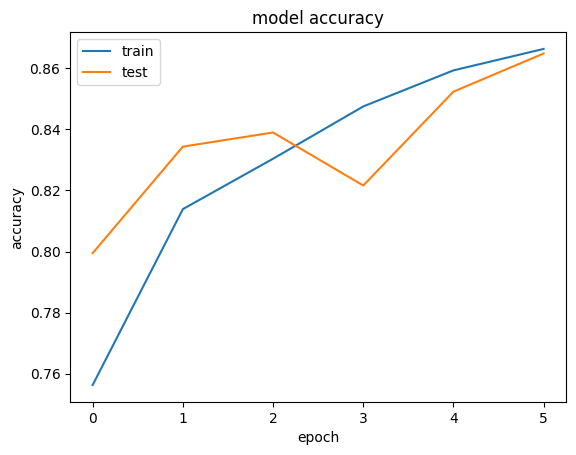

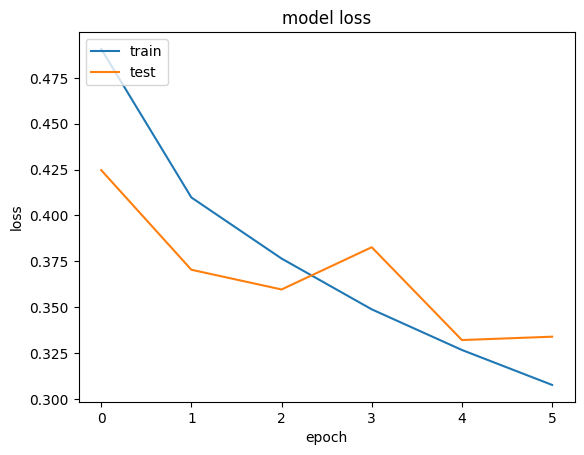

In [79]:
plot_results(lstm_history)

In [80]:
evaluate_model(lstm_model)

Test Score: 0.32933926582336426
Test Accuracy: 0.8597999811172485


GRU MODEL

In [88]:
gru_model,gru_history=gru_model()

Epoch 1/6
250/250 [==============================] - 9s 15ms/step - loss: 0.4866 - accuracy: 0.7571 - val_loss: 0.3964 - val_accuracy: 0.8189
Epoch 2/6
250/250 [==============================] - 3s 12ms/step - loss: 0.3723 - accuracy: 0.8333 - val_loss: 0.3485 - val_accuracy: 0.8443
Epoch 3/6
250/250 [==============================] - 3s 12ms/step - loss: 0.3405 - accuracy: 0.8507 - val_loss: 0.3271 - val_accuracy: 0.8572
Epoch 4/6
250/250 [==============================] - 4s 16ms/step - loss: 0.3209 - accuracy: 0.8603 - val_loss: 0.3363 - val_accuracy: 0.8541
Epoch 5/6
250/250 [==============================] - 3s 13ms/step - loss: 0.3075 - accuracy: 0.8669 - val_loss: 0.3118 - val_accuracy: 0.8661
Epoch 6/6
250/250 [==============================] - 3s 13ms/step - loss: 0.2894 - accuracy: 0.8755 - val_loss: 0.3201 - val_accuracy: 0.8644


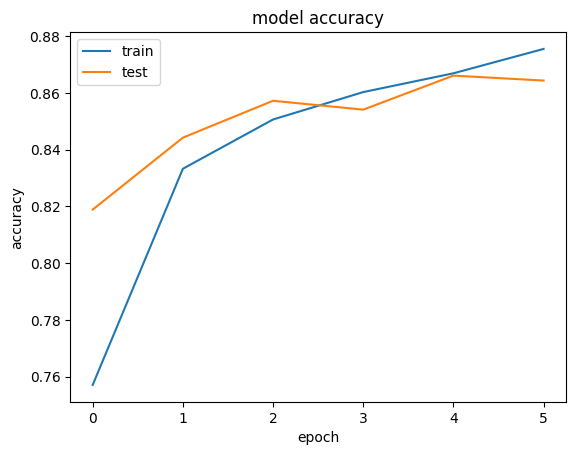

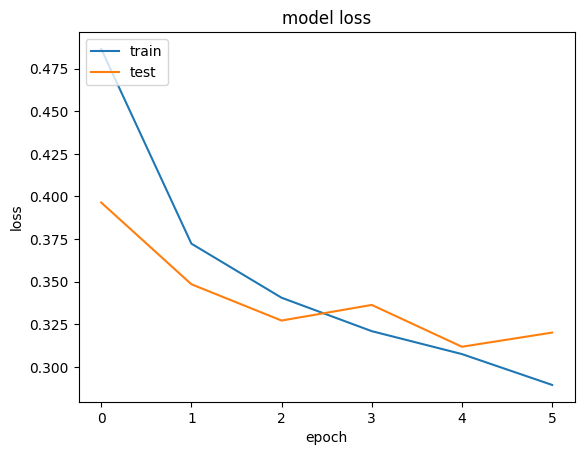

In [89]:
plot_results(gru_history)

In [90]:
evaluate_model(gru_model)

Test Score: 0.3108871877193451
Test Accuracy: 0.8647000193595886


CNN+LSTM MODEL

In [98]:
cnn_lstm_model,cnn_lstm_history=cnn_lstm_model()

Epoch 1/6
250/250 [==============================] - 10s 19ms/step - loss: 0.4815 - accuracy: 0.7644 - val_loss: 0.3607 - val_accuracy: 0.8395
Epoch 2/6
250/250 [==============================] - 3s 12ms/step - loss: 0.3532 - accuracy: 0.8457 - val_loss: 0.3652 - val_accuracy: 0.8357
Epoch 3/6
250/250 [==============================] - 3s 12ms/step - loss: 0.3087 - accuracy: 0.8712 - val_loss: 0.3260 - val_accuracy: 0.8611
Epoch 4/6
250/250 [==============================] - 3s 12ms/step - loss: 0.2605 - accuracy: 0.8942 - val_loss: 0.3352 - val_accuracy: 0.8543
Epoch 5/6
250/250 [==============================] - 3s 12ms/step - loss: 0.2198 - accuracy: 0.9136 - val_loss: 0.3267 - val_accuracy: 0.8615
Epoch 6/6
250/250 [==============================] - 3s 12ms/step - loss: 0.1614 - accuracy: 0.9397 - val_loss: 0.3940 - val_accuracy: 0.8609


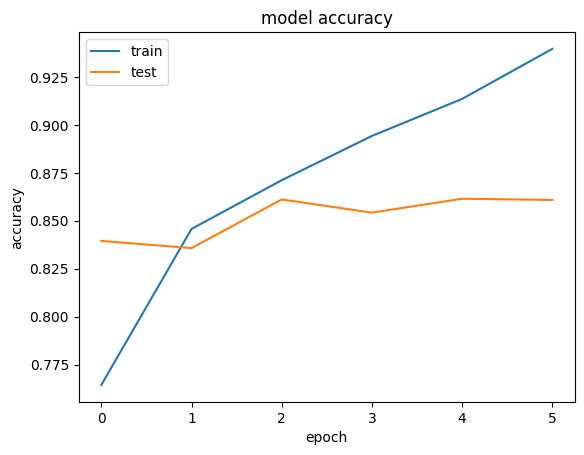

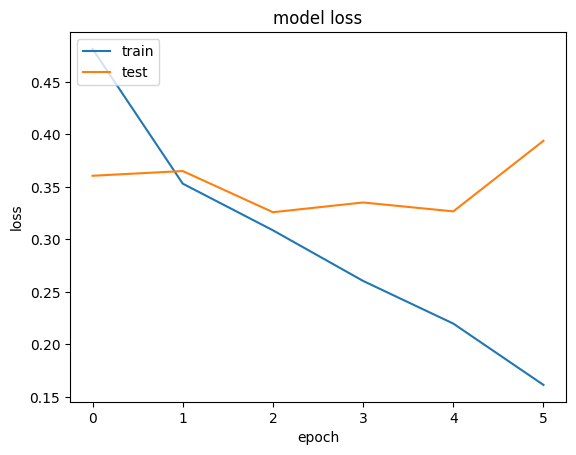

In [99]:
plot_results(cnn_lstm_history)


In [100]:
evaluate_model(cnn_lstm_model)

Test Score: 0.37310898303985596
Test Accuracy: 0.8579000234603882


#WORD2VEC EMBEDDINGS#


In [101]:
!wget https://media.githubusercontent.com/media/eyaler/word2vec-slim/master/GoogleNews-vectors-negative300-SLIM.bin.gz


--2024-05-02 22:42:02--  https://media.githubusercontent.com/media/eyaler/word2vec-slim/master/GoogleNews-vectors-negative300-SLIM.bin.gz
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276467217 (264M) [application/octet-stream]
Saving to: ‘GoogleNews-vectors-negative300-SLIM.bin.gz’

GoogleNews-vectors- 100%[===================>] 263.66M   184MB/s    in 1.4s    

2024-05-02 22:42:08 (184 MB/s) - ‘GoogleNews-vectors-negative300-SLIM.bin.gz’ saved [276467217/276467217]



In [102]:
!gunzip /content/GoogleNews-vectors-negative300-SLIM.bin.gz


In [103]:
from gensim.models.keyedvectors import KeyedVectors
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
print('loading word2vec model…')
word2vec_model = KeyedVectors.load_word2vec_format('/content/GoogleNews-vectors-negative300-SLIM.bin', binary=True)
def getVector(str):
  if str in word2vec_model:
    return word2vec_model[str]
  else:
    return None;
def isInModel(str):
  return str in word2vec_model

loading word2vec model…


In [104]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
  embedding_vector = getVector(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [105]:
len(embedding_matrix)

92547

LSTM MODEL

In [106]:
lstm_model,lstm_history=lstm_model()

Epoch 1/6
250/250 [==============================] - 10s 17ms/step - loss: 0.5133 - accuracy: 0.7361 - val_loss: 0.4075 - val_accuracy: 0.8131
Epoch 2/6
250/250 [==============================] - 3s 13ms/step - loss: 0.4290 - accuracy: 0.8058 - val_loss: 0.3838 - val_accuracy: 0.8274
Epoch 3/6
250/250 [==============================] - 4s 14ms/step - loss: 0.3957 - accuracy: 0.8201 - val_loss: 0.3619 - val_accuracy: 0.8418
Epoch 4/6
250/250 [==============================] - 3s 14ms/step - loss: 0.3695 - accuracy: 0.8348 - val_loss: 0.3459 - val_accuracy: 0.8480
Epoch 5/6
250/250 [==============================] - 3s 13ms/step - loss: 0.3506 - accuracy: 0.8453 - val_loss: 0.3398 - val_accuracy: 0.8518
Epoch 6/6
250/250 [==============================] - 3s 14ms/step - loss: 0.3395 - accuracy: 0.8513 - val_loss: 0.3463 - val_accuracy: 0.8440


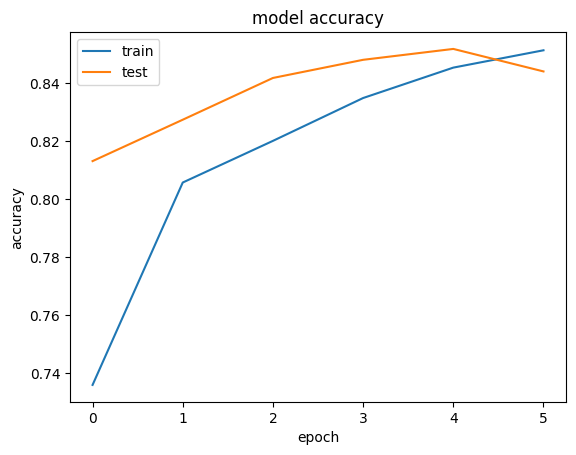

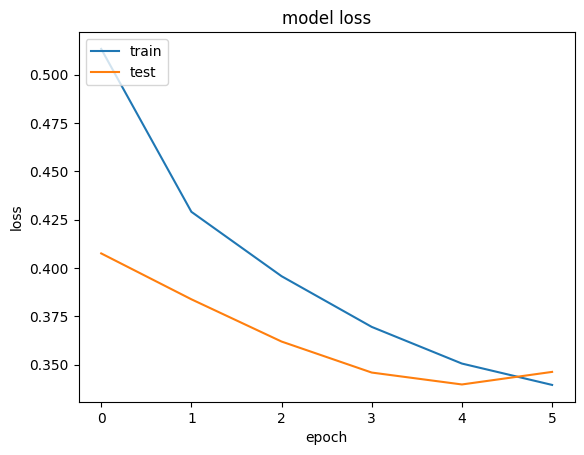

In [107]:
plot_results(lstm_history)

In [108]:
evaluate_model(lstm_model)

Test Score: 0.3471059203147888
Test Accuracy: 0.8414000272750854


GRU MODEL

In [109]:
gru_model,gru_history=gru_model()

Epoch 1/6
250/250 [==============================] - 7s 16ms/step - loss: 0.5157 - accuracy: 0.7377 - val_loss: 0.4198 - val_accuracy: 0.8094
Epoch 2/6
250/250 [==============================] - 3s 13ms/step - loss: 0.3949 - accuracy: 0.8223 - val_loss: 0.3726 - val_accuracy: 0.8342
Epoch 3/6
250/250 [==============================] - 3s 13ms/step - loss: 0.3616 - accuracy: 0.8384 - val_loss: 0.3398 - val_accuracy: 0.8509
Epoch 4/6
250/250 [==============================] - 3s 13ms/step - loss: 0.3418 - accuracy: 0.8494 - val_loss: 0.3405 - val_accuracy: 0.8522
Epoch 5/6
250/250 [==============================] - 3s 13ms/step - loss: 0.3281 - accuracy: 0.8573 - val_loss: 0.3566 - val_accuracy: 0.8393
Epoch 6/6
250/250 [==============================] - 3s 12ms/step - loss: 0.3229 - accuracy: 0.8583 - val_loss: 0.3248 - val_accuracy: 0.8587


In [110]:
evaluate_model(gru_model)

Test Score: 0.3212033212184906
Test Accuracy: 0.8540999889373779


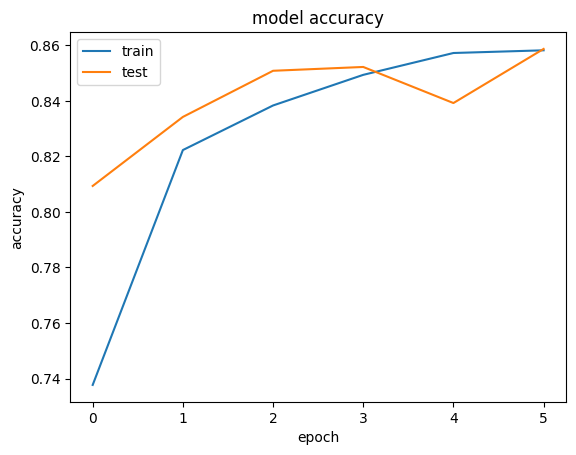

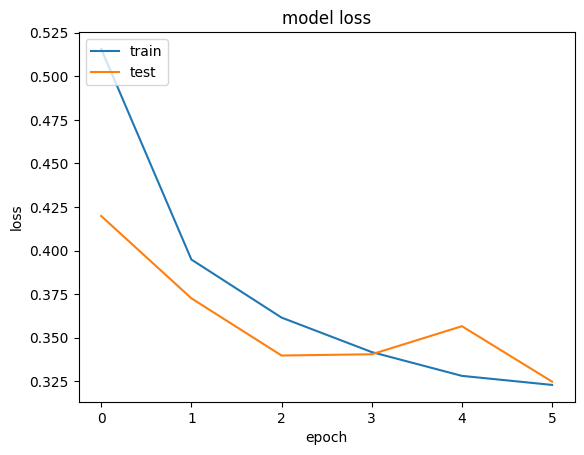

In [111]:
plot_results(gru_history)

CNN+LSTM MODEL

In [118]:
cnnn_lstm_model,cnnn_lstm_history=cnn_lstm_model()

Epoch 1/6
250/250 [==============================] - 11s 17ms/step - loss: 0.5045 - accuracy: 0.7413 - val_loss: 0.3795 - val_accuracy: 0.8301
Epoch 2/6
250/250 [==============================] - 3s 13ms/step - loss: 0.3590 - accuracy: 0.8416 - val_loss: 0.3293 - val_accuracy: 0.8543
Epoch 3/6
250/250 [==============================] - 3s 12ms/step - loss: 0.3007 - accuracy: 0.8729 - val_loss: 0.3197 - val_accuracy: 0.8595
Epoch 4/6
250/250 [==============================] - 3s 12ms/step - loss: 0.2604 - accuracy: 0.8962 - val_loss: 0.3359 - val_accuracy: 0.8666
Epoch 5/6
250/250 [==============================] - 3s 12ms/step - loss: 0.2106 - accuracy: 0.9179 - val_loss: 0.3234 - val_accuracy: 0.8612
Epoch 6/6
250/250 [==============================] - 3s 12ms/step - loss: 0.1460 - accuracy: 0.9480 - val_loss: 0.3771 - val_accuracy: 0.8558


In [119]:
evaluate_model(cnnn_lstm_model)

Test Score: 0.3700268566608429
Test Accuracy: 0.8547999858856201


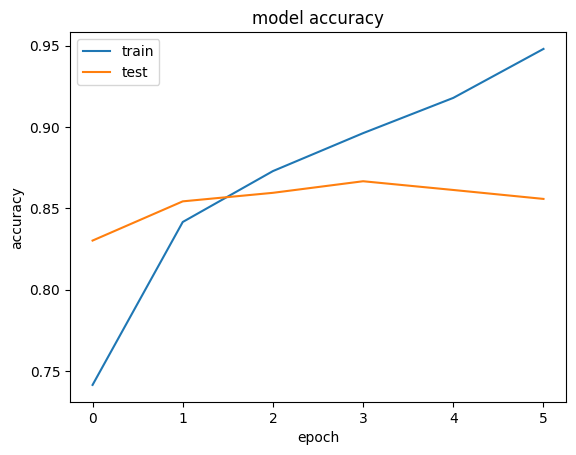

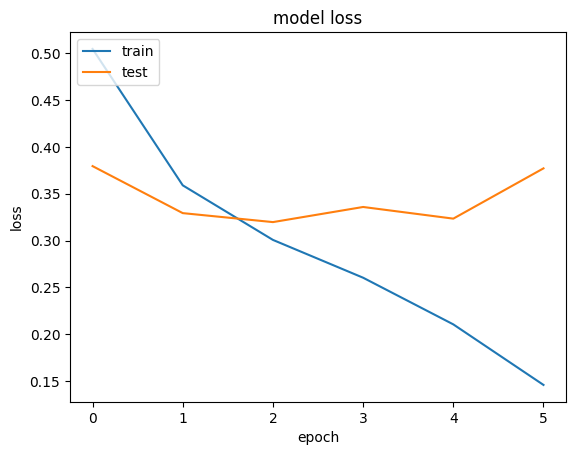

In [120]:
plot_results(cnnn_lstm_history)

#TFIDF EMBEDDING#

The idea is to split X (text) and y and the apply the tfidf with `max_featues=600` to have and input sentence of (1 , 600) shape

In [121]:
X[0]

'One of the other reviewers has mentioned that after watching just Oz episode you ll be hooked They are right as this is exactly what happened with me The first thing that struck me about Oz was its brutality and unflinching scenes of violence which set in right from the word GO Trust me this is not show for the faint hearted or timid This show pulls no punches with regards to drugs sex or violence Its is hardcore in the classic use of the word It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary It focuses mainly on Emerald City an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda Em City is home to many Aryans Muslims gangstas Latinos Christians Italians Irish and more so scuffles death stares dodgy dealings and shady agreements are never far away would say the main appeal of the show is due to the fact that it goes where other shows wouldn dare Forget pretty picture

In [122]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2,shuffle=True)

print(len(X_train), len(X_test), len(y_train) + len(y_test))

40000 10000 50000


In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import tensorflow as tf

# Prepare the data
vectorizer = TfidfVectorizer(max_features =600)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_test)




In [124]:
X_train_tfidf[0].shape

(1, 600)

In [125]:
type(X_train_tfidf) #we need to add the .toarray() method when feeding to the neural network

scipy.sparse._csr.csr_matrix

LSTM MODEL

In [126]:
from keras.layers import Reshape
lstm_model_tf = Sequential()
lstm_model_tf.add(Dense(64, activation='relu', input_shape=(X_train_tfidf.shape[1],)))
lstm_model_tf.add(Reshape((64, 1)))  # Add an additional dimension because LSTM requires 3 dimensional input

lstm_model_tf.add(LSTM(128))
lstm_model_tf.add(Dense(1, activation='sigmoid'))

# Compile your model
lstm_model_tf.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train your model
lstm_history_tf = lstm_model_tf.fit(X_train_tfidf.toarray(), y_train, epochs=6,validation_data=(X_val_tfidf.toarray(), y_test))


Epoch 1/6
1250/1250 [==============================] - 39s 21ms/step - loss: 0.3900 - accuracy: 0.8197 - val_loss: 0.3341 - val_accuracy: 0.8517
Epoch 2/6
1250/1250 [==============================] - 16s 12ms/step - loss: 0.3464 - accuracy: 0.8494 - val_loss: 0.3406 - val_accuracy: 0.8506
Epoch 3/6
1250/1250 [==============================] - 14s 11ms/step - loss: 0.3348 - accuracy: 0.8544 - val_loss: 0.3483 - val_accuracy: 0.8537
Epoch 4/6
1250/1250 [==============================] - 19s 15ms/step - loss: 0.3251 - accuracy: 0.8575 - val_loss: 0.3352 - val_accuracy: 0.8549
Epoch 5/6
1250/1250 [==============================] - 15s 12ms/step - loss: 0.3148 - accuracy: 0.8624 - val_loss: 0.3452 - val_accuracy: 0.8505
Epoch 6/6
1250/1250 [==============================] - 16s 12ms/step - loss: 0.2953 - accuracy: 0.8722 - val_loss: 0.3899 - val_accuracy: 0.8423


In [127]:
# Evaluate the model
score = lstm_model_tf.evaluate(X_val_tfidf.toarray(), y_test, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])


Validation loss: 0.3899242579936981
Validation accuracy: 0.8422999978065491


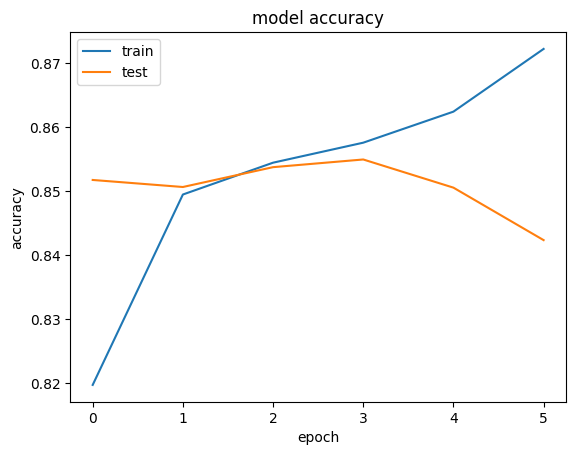

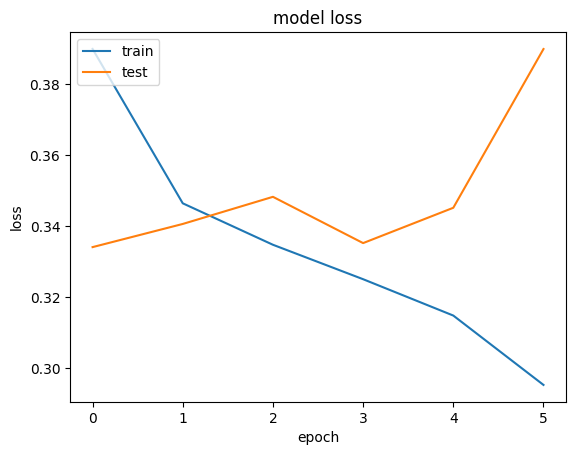

In [128]:
plot_results(lstm_history_tf)

GRU MODEL

In [129]:
gru_model_tf = Sequential()
gru_model_tf.add(Dense(64, activation='relu', input_shape=(X_train_tfidf.shape[1],)))
gru_model_tf.add(Reshape((64, 1)))  # Add an additional dimension

gru_model_tf.add(GRU(128))
gru_model_tf.add(Dense(1, activation='sigmoid'))

# Compile your model
gru_model_tf.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train your model
gru_histoy_tf = gru_model_tf.fit(X_train_tfidf.toarray(), y_train, epochs=6,validation_data=(X_val_tfidf.toarray(), y_test))


Epoch 1/6
1250/1250 [==============================] - 34s 22ms/step - loss: 0.3970 - accuracy: 0.8156 - val_loss: 0.3473 - val_accuracy: 0.8502
Epoch 2/6
1250/1250 [==============================] - 21s 17ms/step - loss: 0.3465 - accuracy: 0.8484 - val_loss: 0.3425 - val_accuracy: 0.8518
Epoch 3/6
1250/1250 [==============================] - 12s 10ms/step - loss: 0.3374 - accuracy: 0.8526 - val_loss: 0.3356 - val_accuracy: 0.8527
Epoch 4/6
1250/1250 [==============================] - 17s 14ms/step - loss: 0.3307 - accuracy: 0.8552 - val_loss: 0.3403 - val_accuracy: 0.8555
Epoch 5/6
1250/1250 [==============================] - 16s 13ms/step - loss: 0.3241 - accuracy: 0.8569 - val_loss: 0.3375 - val_accuracy: 0.8551
Epoch 6/6
1250/1250 [==============================] - 12s 9ms/step - loss: 0.3110 - accuracy: 0.8630 - val_loss: 0.3427 - val_accuracy: 0.8536


In [130]:
# Evaluate the model
score = gru_model_tf.evaluate(X_val_tfidf.toarray(), y_test, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.3426736295223236
Validation accuracy: 0.853600025177002


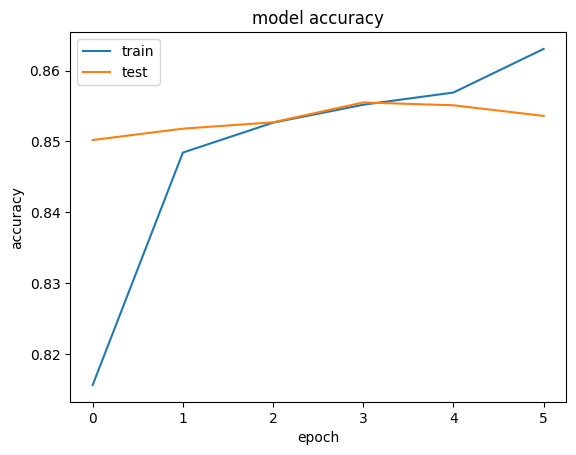

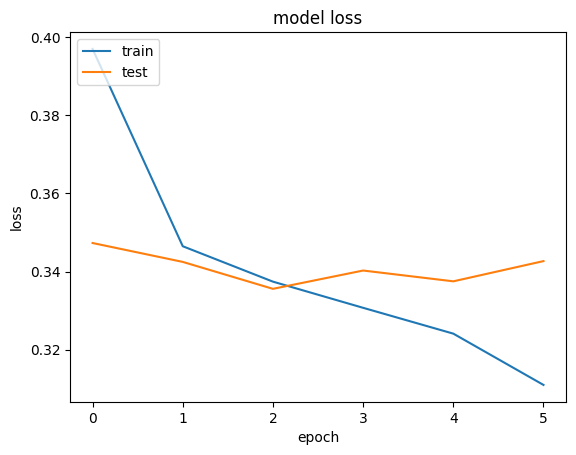

In [131]:
plot_results(gru_histoy_tf)

CNN+LSTM MODEL

In [132]:
cnn_lstm_model_tf = Sequential()
cnn_lstm_model_tf.add(Dense(64, activation='relu', input_shape=(X_train_tfidf.shape[1],)))
cnn_lstm_model_tf.add(Reshape((64, 1)))  # Add an additional dimension
cnn_lstm_model_tf.add(Conv1D(128,5,activation='relu'))
cnn_lstm_model_tf.add(MaxPooling1D(pool_size=2))
cnn_lstm_model_tf.add(LSTM(128))
cnn_lstm_model_tf.add(Dense(1,activation='sigmoid'))
cnn_lstm_model_tf.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_lstm_history_tf=cnn_lstm_model_tf.fit(X_train_tfidf.toarray(), y_train, epochs=6,validation_data=(X_val_tfidf.toarray(), y_test))

Epoch 1/6
1250/1250 [==============================] - 29s 17ms/step - loss: 0.3913 - accuracy: 0.8220 - val_loss: 0.3421 - val_accuracy: 0.8532
Epoch 2/6
1250/1250 [==============================] - 14s 11ms/step - loss: 0.3306 - accuracy: 0.8572 - val_loss: 0.3402 - val_accuracy: 0.8507
Epoch 3/6
1250/1250 [==============================] - 12s 10ms/step - loss: 0.2987 - accuracy: 0.8716 - val_loss: 0.3606 - val_accuracy: 0.8551
Epoch 4/6
1250/1250 [==============================] - 12s 10ms/step - loss: 0.2624 - accuracy: 0.8899 - val_loss: 0.3801 - val_accuracy: 0.8448
Epoch 5/6
1250/1250 [==============================] - 14s 11ms/step - loss: 0.2300 - accuracy: 0.9068 - val_loss: 0.3785 - val_accuracy: 0.8439
Epoch 6/6
1250/1250 [==============================] - 12s 10ms/step - loss: 0.1969 - accuracy: 0.9219 - val_loss: 0.4227 - val_accuracy: 0.8380


In [133]:
# Evaluate the model
score = cnn_lstm_model_tf.evaluate(X_val_tfidf.toarray(), y_test, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.42274385690689087
Validation accuracy: 0.8379999995231628


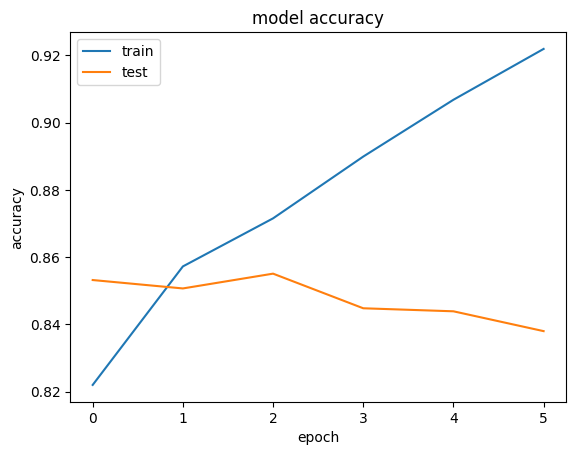

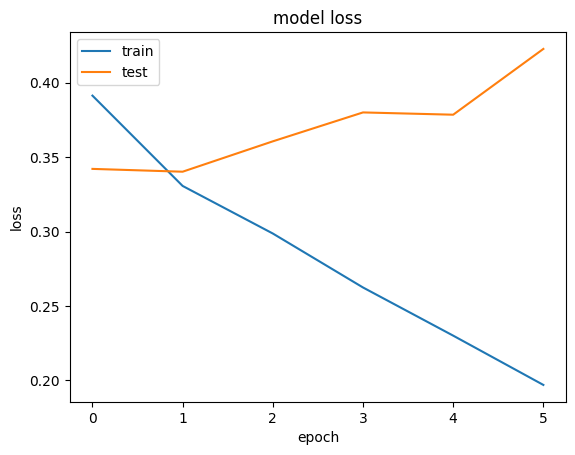

In [134]:
plot_results(cnn_lstm_history_tf)